Fashion Product Trend Analysis from E-commerce Platforms
This project explores product trends using real-world fashion data. We analyze attributes like category, gender, base color,
season, and launch year to uncover insights about current fashion preferences and trends.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"/content/myntra_products_catalog.csv")
df.head()


,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [ ]:
#Data Exploration
print(df.info())
print(df.describe())
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 11597 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     11597 non-null  int64 
 1   ProductName   11597 non-null  object
 2   ProductBrand  11597 non-null  object
 3   Gender        11597 non-null  object
 4   Price (INR)   11597 non-null  int64 
 5   NumImages     11597 non-null  int64 
 6   Description   11597 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 815.4+ KB
None
          ProductID   Price (INR)     NumImages
count  1.159700e+04  11597.000000  11597.000000
mean   9.962030e+06   1460.912995      4.967319
std    1.297211e+06   2159.003043      1.063547
min    1.012060e+05    153.000000      1.000000
25%    1.006388e+07    649.000000      5.000000
50%    1.015539e+07    939.000000      5.000000
75%    1.021566e+07   1499.000000      5.000000
max    1.027514e+07  63090.000000   

,0
ProductID,0
ProductName,0
ProductBrand,0
Gender,0
Price (INR),0
NumImages,0
Description,0
PrimaryColor,0


In [ ]:
#Dealing with missing values
df.dropna(inplace=True)

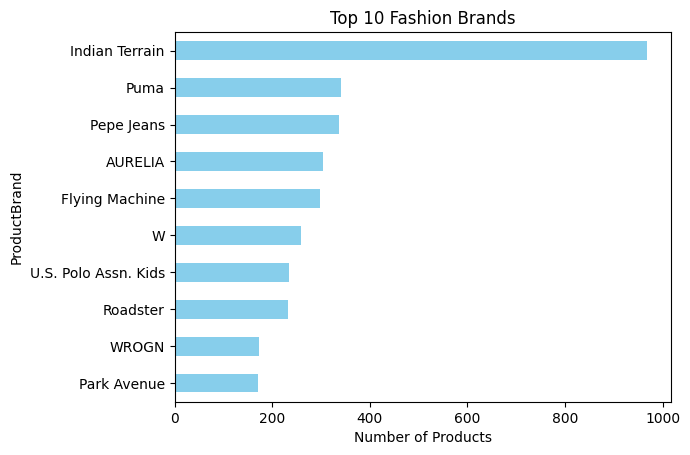

In [ ]:
top_brands = df['ProductBrand'].value_counts().head(10)
top_brands.plot(kind='barh', color='skyblue')
plt.title("Top 10 Fashion Brands")
plt.xlabel("Number of Products")
plt.gca().invert_yaxis()
plt.show()


<ipython-input-5-2dbee9cfe172>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


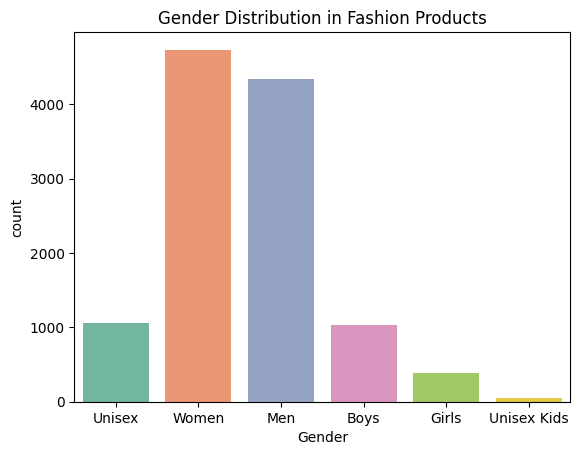

In [ ]:
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Gender Distribution in Fashion Products")
plt.show()

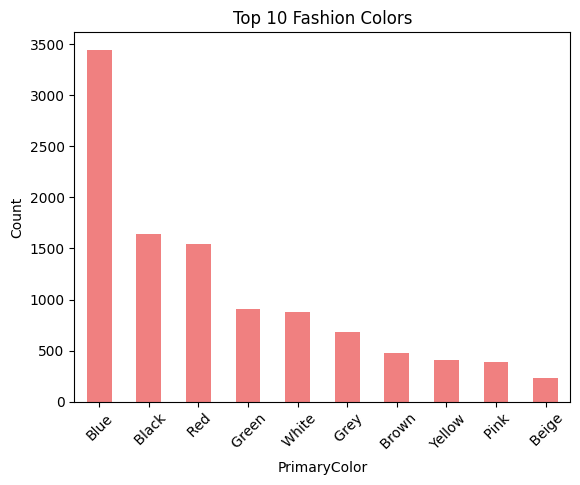

In [ ]:
top_colors = df['PrimaryColor'].value_counts().head(10)
top_colors.plot(kind='bar', color='lightcoral')
plt.title("Top 10 Fashion Colors")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-7-888119341efc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Price (INR)', palette='Set3')


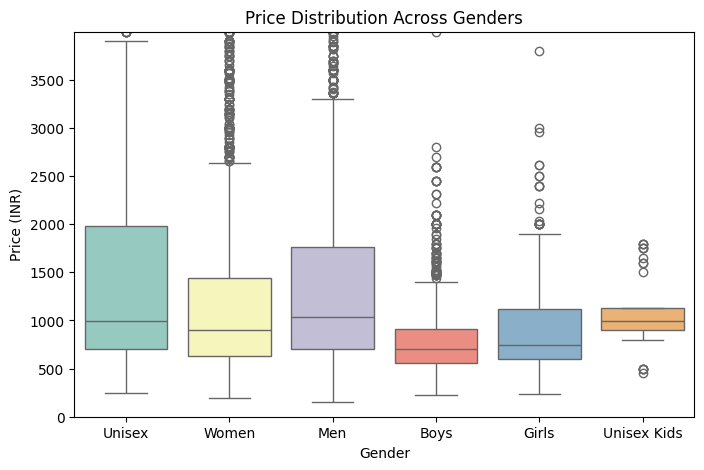

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Price (INR)', palette='Set3')
plt.title("Price Distribution Across Genders")
plt.ylim(0, df['Price (INR)'].quantile(0.95))  # Remove extreme outliers
plt.show()


<ipython-input-8-264157876025>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NumImages', palette='Blues')


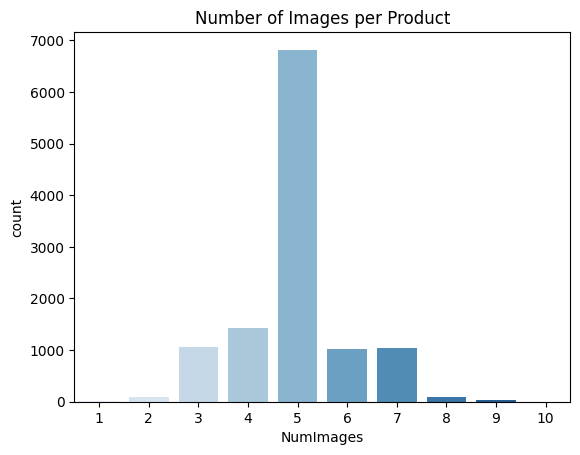

In [ ]:
sns.countplot(data=df, x='NumImages', palette='Blues')
plt.title("Number of Images per Product")
plt.show()

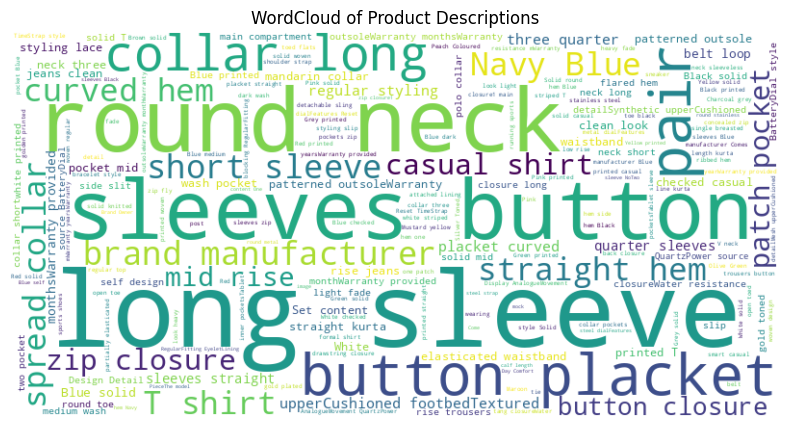

In [ ]:
from wordcloud import WordCloud

# Combine all descriptions
text = ' '.join(df['Description'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Product Descriptions")
plt.show()

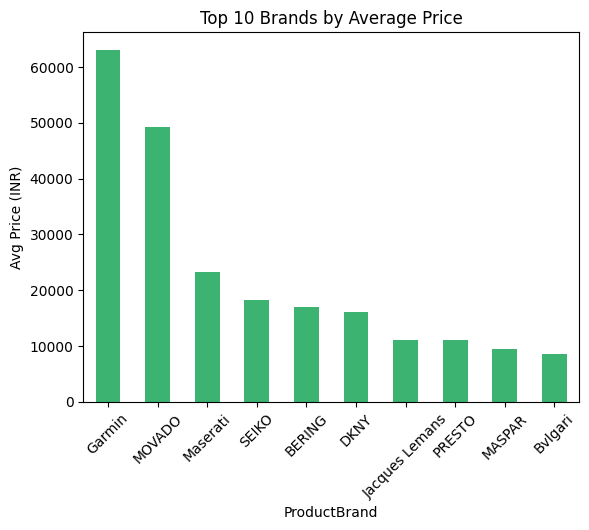

In [ ]:
brand_prices = df.groupby("ProductBrand")["Price (INR)"].mean().sort_values(ascending=False).head(10)
brand_prices.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 Brands by Average Price")
plt.ylabel("Avg Price (INR)")
plt.xticks(rotation=45)
plt.show()



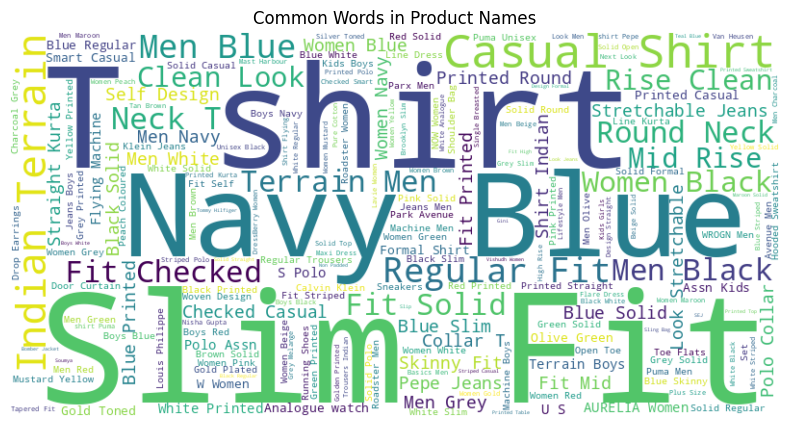

In [ ]:
from wordcloud import WordCloud

names = ' '.join(df['ProductName'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Product Names")
plt.show()


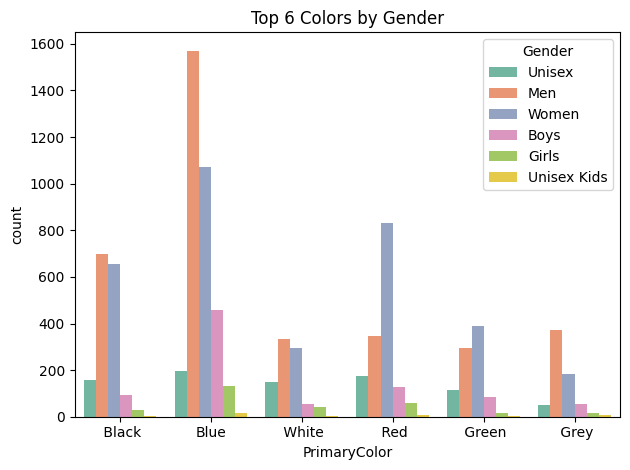

In [ ]:
top_colors = df['PrimaryColor'].value_counts().head(6).index
filtered_df = df[df['PrimaryColor'].isin(top_colors)]

sns.countplot(data=filtered_df, x='PrimaryColor', hue='Gender', palette='Set2')
plt.title("Top 6 Colors by Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



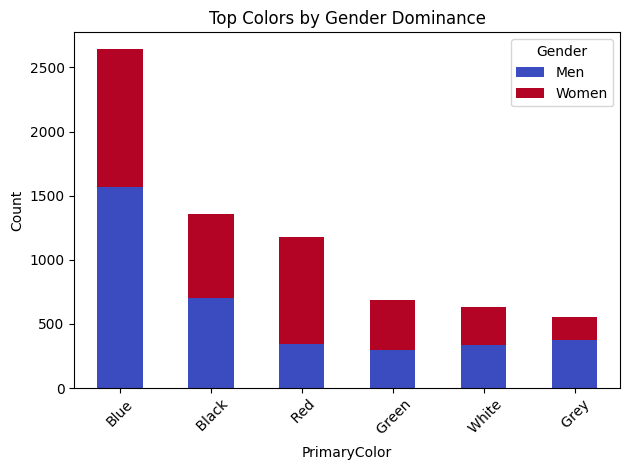

In [ ]:
# %%
color_gender_ratio = df.groupby(['PrimaryColor', 'Gender']).size().unstack(fill_value=0)
color_gender_ratio['Dominant Gender'] = color_gender_ratio.idxmax(axis=1)

# Calculate 'Total' by summing only the numerical columns (gender counts)
# We can drop the 'Dominant Gender' column temporarily for the sum
color_gender_ratio['Total'] = color_gender_ratio.drop(columns=['Dominant Gender']).sum(axis=1)

top_dominant = color_gender_ratio.sort_values('Total', ascending=False).head(6)

# Changed column selection from ['Male', 'Female'] to ['Men', 'Women']
top_dominant[['Men', 'Women']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Top Colors by Gender Dominance")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


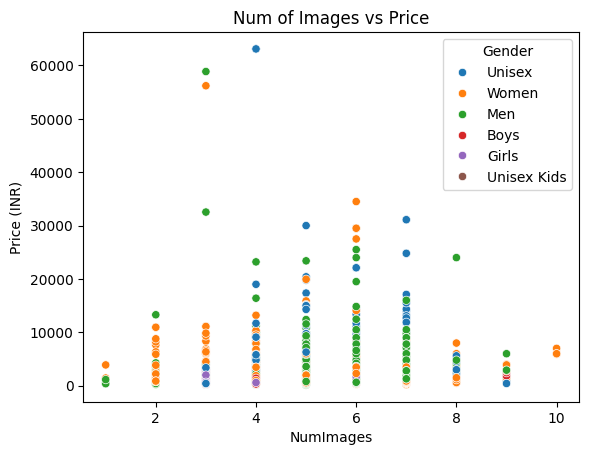

In [ ]:
sns.scatterplot(data=df, x='NumImages', y='Price (INR)', hue='Gender')
plt.title("Num of Images vs Price")
plt.show()


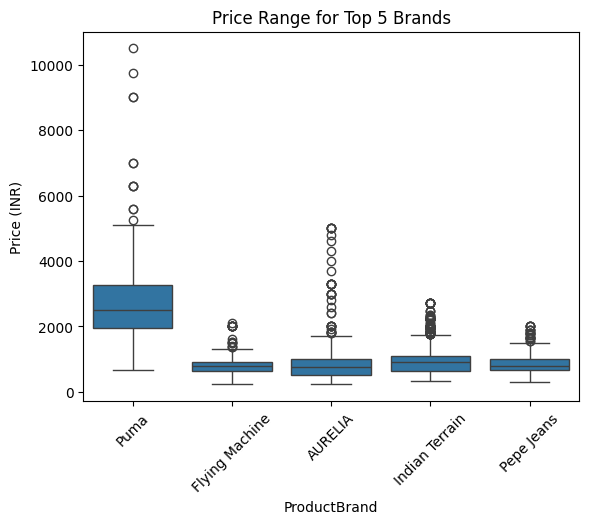

In [ ]:
top_brands = df['ProductBrand'].value_counts().head(5).index
sns.boxplot(data=df[df['ProductBrand'].isin(top_brands)], x='ProductBrand', y='Price (INR)')
plt.title("Price Range for Top 5 Brands")
plt.xticks(rotation=45)
plt.show()


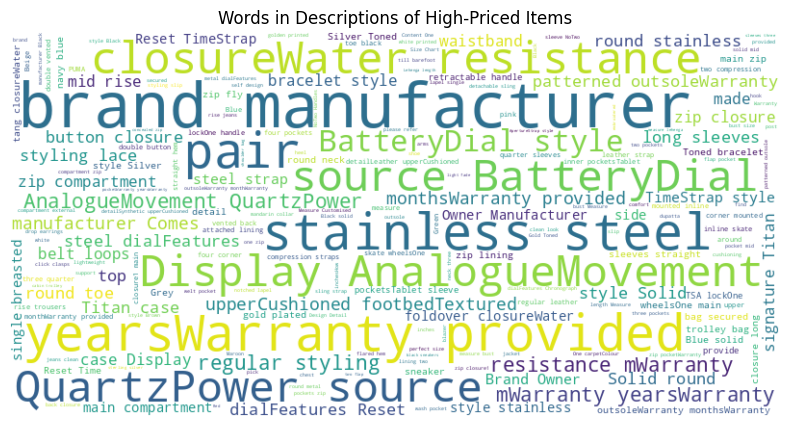

In [ ]:
high_end = df[df['Price (INR)'] > df['Price (INR)'].quantile(0.95)]
text = ' '.join(high_end['Description'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Words in Descriptions of High-Priced Items")
plt.show()


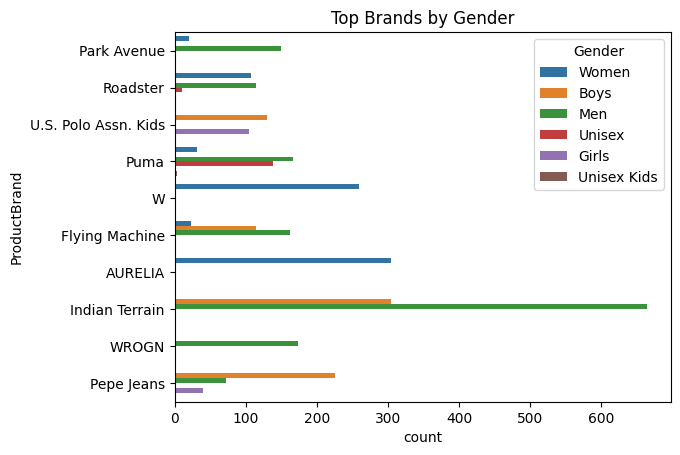

In [ ]:
top_gender_brands = df[df['ProductBrand'].isin(df['ProductBrand'].value_counts().head(10).index)]
sns.countplot(data=top_gender_brands, y='ProductBrand', hue='Gender')
plt.title("Top Brands by Gender")
plt.show()


Key Insights:

- The most popular fashion brands are Indian terrain.
- Female-oriented fashion products dominate the dataset.
- Top colors include Blue, Black, and Red.
- The majority of products have 5 images.
- Product descriptions often include terms like "tshirt", "long sleeve", "round neck", etc.

## Business Implication:

This analysis can help fashion retailers and designers optimize their offerings by understanding consumer preferences in color, pricing, and branding.